# Convolutional Neural Network for visual recognition of Digits

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Importing the data 

In [21]:
from keras.datasets import mnist

In [35]:
(x_train, y_train), (x_test, y_test) = mnist.load_data('C:/Users/Chandan J/Downloads/mnist.npz')

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
y_train.shape

(60000,)

In [55]:
x_test.shape

(10000, 28, 28)

In [70]:
x_train_t = x_train[:42000]
x_train_t.shape

(42000, 28, 28)

In [71]:
y_train_t = y_train[:42000]
y_train_t.shape 

(42000,)

In [72]:
x_test_t = np.concatenate((x_test,x_train[42000:60000]),axis = 0)
x_test_t.shape

(28000, 28, 28)

In [73]:
y_test_t = np.concatenate((y_test,y_train[42000:60000]),axis = 0)
y_test_t.shape

(28000,)

### Converting the multi-class vector to binary matrix

In [74]:
from keras.utils.np_utils import to_categorical

In [75]:
##x_train_t = x_train_t.reshape(-1, 28*28)
##x_test_t = x_test_t.reshape(-1, 28*28)

In [76]:
## A classification model with multiple classes doesn't work well if you don't have classes distributed in a binary matrix.

y_train_cat = to_categorical(y_train_t)
y_test_cat = to_categorical(y_test_t)
print(y_train_cat.shape)
print(x_train_t.shape)
print("label_value: {} , categorical representation: {}".format(y_train[2],y_train_cat[2,]))

(42000, 10)
(42000, 28, 28)
label_value: 4 , categorical representation: [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


### Convolutional model with fully connected network

In [105]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten, Activation
from keras.layers import BatchNormalization, Dropout
import tensorflow as tf
from keras.callbacks import EarlyStopping

K.clear_session()

model = Sequential()

model.add(Conv2D(32, (2, 2), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2),padding = "same"))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

adam = Adam(lr=0.01, decay=0.05)

earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              callbacks = earlystopping,
              metrics=['accuracy'])

In [106]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              6273000   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
__________

In [107]:
x_train_t = x_train_t.reshape(-1, 28, 28, 1)
x_test_t = x_test_t.reshape(-1, 28, 28, 1)

In [108]:
h = model.fit(x_train_t, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

C:\Users\Chandan J\Anaconda3\envs\mnist\lib\site-packages\keras\backend\tensorflow_backend.py:2250: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 171s - loss: 0.2302 - acc: 0.9417 - val_loss: 0.0884 - val_acc: 0.9714
Epoch 2/10
37800/37800 [==============================] - 137s - loss: 0.0643 - acc: 0.9799 - val_loss: 0.0741 - val_acc: 0.9807
Epoch 3/10
37800/37800 [==============================] - 137s - loss: 0.0433 - acc: 0.9867 - val_loss: 0.0667 - val_acc: 0.9814
Epoch 4/10
37800/37800 [==============================] - 137s - loss: 0.0329 - acc: 0.9903 - val_loss: 0.0627 - val_acc: 0.9829
Epoch 5/10
37800/37800 [==============================] - 138s - loss: 0.0266 - acc: 0.9921 - val_loss: 0.0647 - val_acc: 0.9831
Epoch 6/10
37800/37800 [==============================] - 137s - loss: 0.0220 - acc: 0.9934 - val_loss: 0.0608 - val_acc: 0.9838
Epoch 7/10
37800/37800 [==============================] - 138s - loss: 0.0181 - acc: 0.9948 - val_loss: 0.0604 - val_acc: 0.9833
Epoch 8/10
37800/37800 [========================

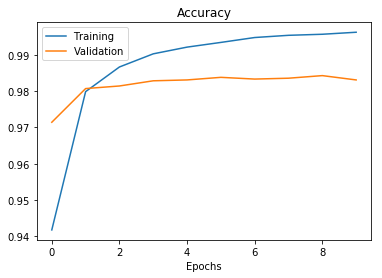

In [109]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [110]:
test_accuracy = model.evaluate(x_test_t, y_test_cat)[1]
test_accuracy

27968/28000 [============================>.] - ETA: 0s

0.98310714285714285